In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../Base_Umbilo_Diaria.csv', sep=';',decimal=',')
df.set_index('Dia', inplace=True)

df

,Q_entrada,NH_entrada,TSS_entrada,DQO_entrada,DBO_entrada,TN_entrada,TKN_entrada,TP_entrada,PO_entrada,Q_saida,NH_saida,NO_saida,TSS_saida,DQO_saida,DBO_saida,TN_saida,TKN_saida,TP_saida,PO_saida
Dia,,,,,,,,,,,,,,,,,,,
0,4719.000000,21.000000,271.000000,391.000000,198.575000,34.060000,34.060000,8.020000,4.6,6135.066621,3.854908,0.079306,6.642565,83.782370,3.890641,5.042310,4.963005,0.428499,0.326124
1,5866.458829,22.000327,276.000327,399.999347,203.059809,35.360294,35.360294,8.099990,4.6,5636.285517,0.773286,0.349220,5.766311,62.736147,2.720311,1.978541,1.629322,9.226503,9.141557
2,5358.157069,23.998870,281.996233,406.995103,206.957307,37.558734,37.558734,8.149966,4.6,5128.278103,0.572453,0.692591,5.304955,55.605625,2.376578,2.021954,1.329363,11.651663,11.575981
3,5266.313109,22.999791,278.000209,401.000418,203.710285,36.399787,36.399787,8.109998,4.6,5036.211393,0.386242,1.833623,4.898502,52.867768,2.081922,2.924917,1.091294,12.464589,12.396924
4,6671.931586,21.000432,274.999568,396.999136,201.824410,34.220441,34.220441,8.060004,4.6,6441.737326,0.376058,4.070777,4.788757,51.670731,2.013649,5.128931,1.058154,10.463329,10.398509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,5587.915779,22.000000,182.001170,263.000000,134.093479,30.780012,30.780012,6.900000,4.6,5357.809665,0.229408,20.738647,3.517159,35.116708,1.583500,21.428344,0.689698,6.256764,6.209620
362,5984.690649,22.998229,179.999646,259.000354,131.495253,31.668215,31.668215,6.869996,4.6,5754.451216,0.270272,21.514507,3.509423,34.582476,1.606304,22.239991,0.725484,5.447559,5.400288
363,8328.225128,19.001002,177.000334,255.999332,129.609978,27.521002,27.521002,6.830000,4.6,8097.935230,0.336837,19.448765,3.977019,34.977963,1.878834,20.261268,0.812503,4.594725,4.540749


In [3]:
y = df['DQO_saida']
X = df.drop(['DQO_saida',
            'Q_saida',
            'NH_saida',
            'NO_saida',
            'TSS_saida',
            'DBO_saida',
            'TN_saida',
            'TKN_saida',
            'TP_saida',
            'PO_saida',
            # 'DBO_entrada',
            # 'DQO_entrada',
            # 'TKN_entrada',
            # 'TP_entrada',
            # 'PO_entrada'
            ], axis=1)

# X = df.drop(['DQO_saida','Q_saida','NH_saida','NO_saida','TSS_saida','DBO_saida','TN_saida','TKN_saida','TP_saida','PO_saida'], axis=1)

print("X", X.shape)
print("y", y.shape)


X (366, 9)
y (366,)


In [4]:
print(X.columns)
print(y.name)

Index(['Q_entrada', 'NH_entrada', 'TSS_entrada', 'DQO_entrada', 'DBO_entrada',
       'TN_entrada', 'TKN_entrada', 'TP_entrada', 'PO_entrada'],
      dtype='object')
DQO_saida


In [5]:
seed = 42

# separando treino e teste
X_training, X_test, y_training, y_test = train_test_split(X, y, shuffle=False, test_size=0.082) 
print("Test set X", X_test.shape)
print("Test set y", y_test.shape)

Test set X (31, 9)
Test set y (31,)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


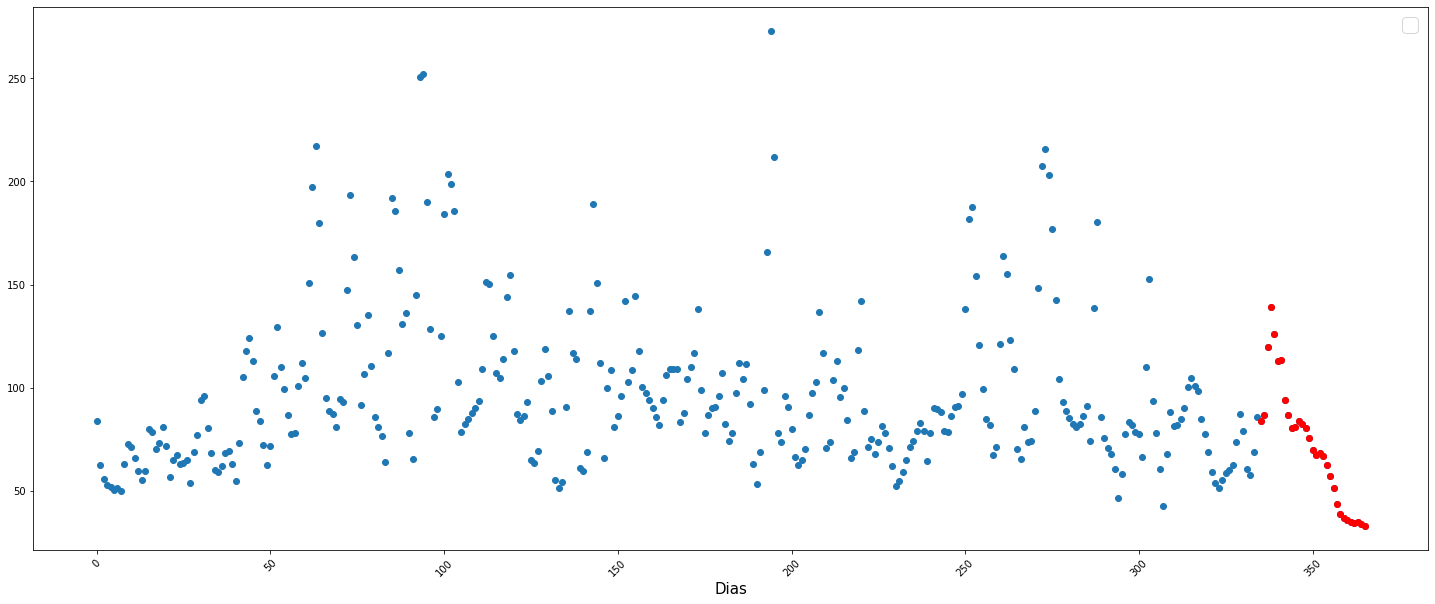

In [6]:
# Distribuição dos valores de y ao longo da série temporal
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(1,1,1) 
# plt.title('', fontsize=25)
plt.scatter(y.index,y)
plt.scatter(y_test.index, y_test, c='r')
plt.legend(fontsize=20)
plt.xlabel('Dias', fontsize=15)
plt.xticks(fontsize=10, rotation=45)

# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%d'))

plt.show()

In [7]:
# Padronização (Standardization) para o y
# Sempre usar os dados de treino apenas para construir o modelo, então transformar o teste com base no treino (como se o teste fossem dados novos)
y_train = np.array(y_training).reshape(len(y_training),1)
y_testing = np.array(y_test).reshape(len(y_test),1)

scalery = StandardScaler().fit(y_train)

normalized_y_train = pd.DataFrame(
    scalery.transform(y_train),
    columns = [y_training.name],
    index = y_training.index
)
normalized_y_train = normalized_y_train.squeeze()

normalized_y_test = pd.DataFrame(
    scalery.transform(y_testing),
    columns = [y_test.name],
    index = y_test.index
)
normalized_y_test = normalized_y_test.squeeze()


# Padronização dos previsores (DataFrame X)
scalerX = StandardScaler().fit(X_training)

normalized_x_train = pd.DataFrame(
    scalerX.transform(X_training),
    columns = X_training.columns,
    index = X_training.index
)


normalized_x_test = pd.DataFrame(
    scalerX.transform(X_test),
    columns = X_test.columns,
    index = X_test.index
)

In [8]:
# Linear Regression

# criando o objeto do modelo com LinearRegression
reg = LinearRegression()

# treinando o modelo
reg.fit(normalized_x_train, normalized_y_train)

# printando os resultados da regressão linear
print(reg.score(normalized_x_train, normalized_y_train))

# pegando e imprimindo os coeficientes
print(reg.coef_)
print(reg.intercept_)

0.5781953897129795
[  0.24270906   0.6193174    1.61533626 -20.08598478  10.7999351
  -0.49659077  -0.49659077   9.03462657   0.        ]
-1.2576312938750031e-15


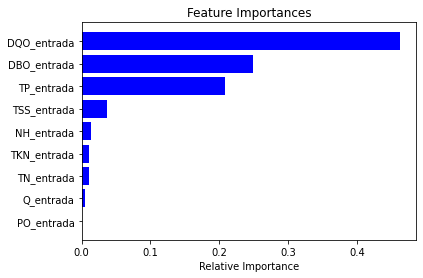

In [9]:
# desenhando o gráfico de impoartância de variáveis
features = normalized_x_train.columns
importances = abs(reg.coef_)/sum(abs(reg.coef_))
indices = np.argsort(importances)


plt.title('Feature Importances')
plt.barh(range(len(importances[indices][-16:])), importances[indices][-16:], color='b', align='center')
plt.yticks(range(len(importances[indices][-16:])), [features[i] for i in indices[-16:]])
plt.xlabel('Relative Importance')
plt.show()

In [10]:
# Feature importance em DataFrame para ser mais consumível
df_importances = pd.DataFrame({'feature': features, 'importances': importances, 'coeficientes': reg.coef_})
df_importances.sort_values(by='importances', ascending=False)

,feature,importances,coeficientes
3,DQO_entrada,0.462906,-20.085985
4,DBO_entrada,0.248898,10.799935
7,TP_entrada,0.208214,9.034627
2,TSS_entrada,0.037227,1.615336
1,NH_entrada,0.014273,0.619317
6,TKN_entrada,0.011445,-0.496591
5,TN_entrada,0.011445,-0.496591
0,Q_entrada,0.005594,0.242709
8,PO_entrada,0.000000,0.000000


In [11]:
# Realizando a predição no teste
y_test_pred_lr = reg.predict(normalized_x_test)

y_test_pred_lr = np.array(y_test_pred_lr).reshape(len(y_test_pred_lr),1)
y_test_pred_lr = scalery.inverse_transform(y_test_pred_lr)
y_test_pred_lr = pd.DataFrame(y_test_pred_lr, columns=[normalized_y_test.name], index = normalized_y_test.index )
y_test_pred_lr = y_test_pred_lr.squeeze()

y_test_pred_lr



# Análise dos erros das previsões
rmse_test_lr = math.sqrt(mean_squared_error(y_test, y_test_pred_lr))
mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr)
mape_test_lr = mean_absolute_percentage_error(y_test, y_test_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)


df_metricas = pd.DataFrame(data={'RSME':[rmse_test_lr], 'MAE':[mae_test_lr], 'MAPE':[mape_test_lr],'R²':[r2_test_lr]})
df_metricas

,RSME,MAE,MAPE,R²
0,11.743588,10.022309,0.183422,0.841847


In [12]:
# Preparação do DataFrame comparativo entre a previsão e o valor real, indexado pelo dia

df_comparacao = pd.concat([y_test,y_test_pred_lr],axis=1)
df_comparacao.columns = ['Valor_Real','Valor_Predito']
df_comparacao['Diferenca_percentual'] = 100*(df_comparacao['Valor_Predito'] - df_comparacao['Valor_Real'])/df_comparacao['Valor_Real']
df_comparacao.sort_index(inplace=True)
df_comparacao

,Valor_Real,Valor_Predito,Diferenca_percentual
Dia,,,
335,83.784619,77.006163,-8.090336
336,86.842041,108.685505,25.153097
337,119.987156,126.600954,5.512089
338,138.940253,123.488343,-11.121262
339,126.281606,115.580279,-8.474177
340,112.852382,125.648432,11.338750
341,113.403341,123.299819,8.726796
342,94.146869,86.926947,-7.668786
343,86.724664,103.742228,19.622519


        RSME        MAE      MAPE        R²
0  11.743588  10.022309  0.183422  0.841847


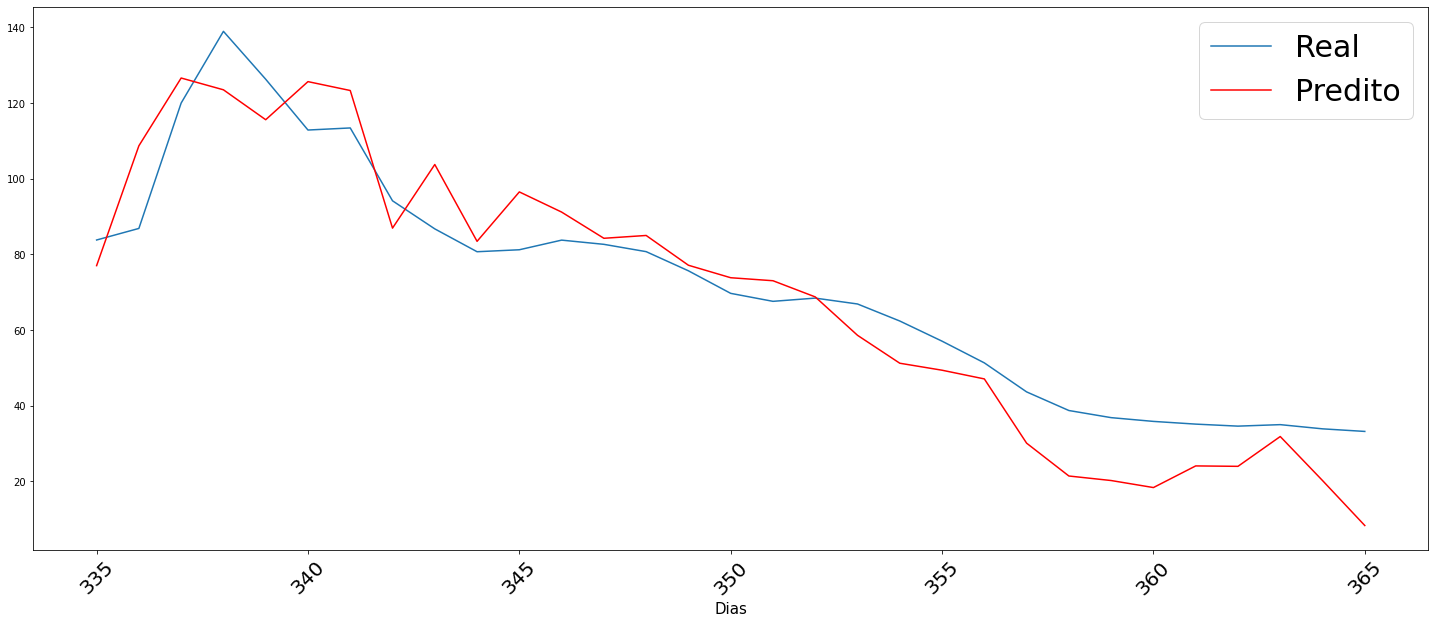

In [13]:
print(df_metricas)
import matplotlib.dates as mdates
# Visualização gráfica das predições comparadas aos valores reais
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(1,1,1) 
# plt.title('', fontsize=25)
plt.plot(df_comparacao.index, df_comparacao['Valor_Real'], label = 'Real')
plt.plot(df_comparacao.index, df_comparacao['Valor_Predito'], label = 'Predito', c='r')
plt.legend(fontsize=30)
plt.xlabel('Dias', fontsize=15)
plt.xticks(fontsize=20, rotation=45)

# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%d'))

plt.show()

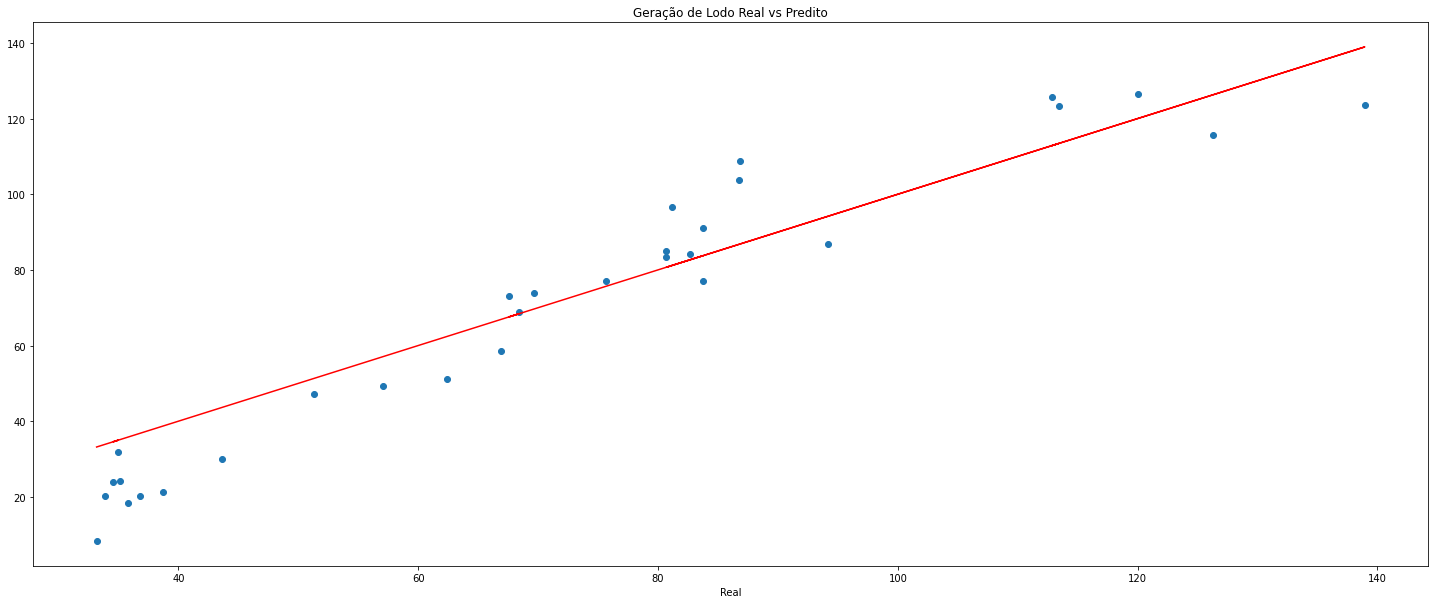

In [14]:
# Visualização gráfica das predições por valores reais
plt.figure(figsize=(25,10))
plt.title('Geração de Lodo Real vs Predito')
plt.scatter(df_comparacao['Valor_Real'], df_comparacao['Valor_Predito'])
plt.plot(df_comparacao['Valor_Real'],df_comparacao['Valor_Real'],c='r')
plt.xlabel('Previsto')
plt.xlabel('Real')
plt.show()

In [15]:
# from scipy.stats import spearmanr
# from scipy.cluster import hierarchy
# from scipy.spatial.distance import squareform

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
# corr = spearmanr(normalized_x_train).correlation

# # Ensure the correlation matrix is symmetric
# corr = (corr + corr.T) / 2
# np.fill_diagonal(corr, 1)

# # We convert the correlation matrix to a distance matrix before performing
# # hierarchical clustering using Ward's linkage.
# distance_matrix = 1 - np.abs(corr)

# dist_linkage = hierarchy.ward(squareform(distance_matrix))
# dendro = hierarchy.dendrogram(
#     dist_linkage, labels=X.columns, ax=ax1, leaf_rotation=90
# )
# dendro_idx = np.arange(0, len(dendro["ivl"]))

# ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
# ax2.set_xticks(dendro_idx)
# ax2.set_yticks(dendro_idx)
# ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
# ax2.set_yticklabels(dendro["ivl"])
# fig.tight_layout()
# plt.show()

In [16]:
normalized_x_train.corr()

,Q_entrada,NH_entrada,TSS_entrada,DQO_entrada,DBO_entrada,TN_entrada,TKN_entrada,TP_entrada,PO_entrada
Q_entrada,1.000000,-0.058856,-0.062833,-0.062747,-0.062831,-0.079088,-0.079088,-0.062795,NaN
NH_entrada,-0.058856,1.000000,0.178544,0.178331,0.178387,0.787613,0.787613,0.178549,NaN
TSS_entrada,-0.062833,0.178544,1.000000,0.999991,0.999991,0.746886,0.746886,0.999986,NaN
DQO_entrada,-0.062747,0.178331,0.999991,1.000000,0.999997,0.746747,0.746747,0.999995,NaN
DBO_entrada,-0.062831,0.178387,0.999991,0.999997,1.000000,0.746785,0.746785,0.999994,NaN
TN_entrada,-0.079088,0.787613,0.746886,0.746747,0.746785,1.000000,1.000000,0.746896,NaN
TKN_entrada,-0.079088,0.787613,0.746886,0.746747,0.746785,1.000000,1.000000,0.746896,NaN
TP_entrada,-0.062795,0.178549,0.999986,0.999995,0.999994,0.746896,0.746896,1.000000,NaN
PO_entrada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


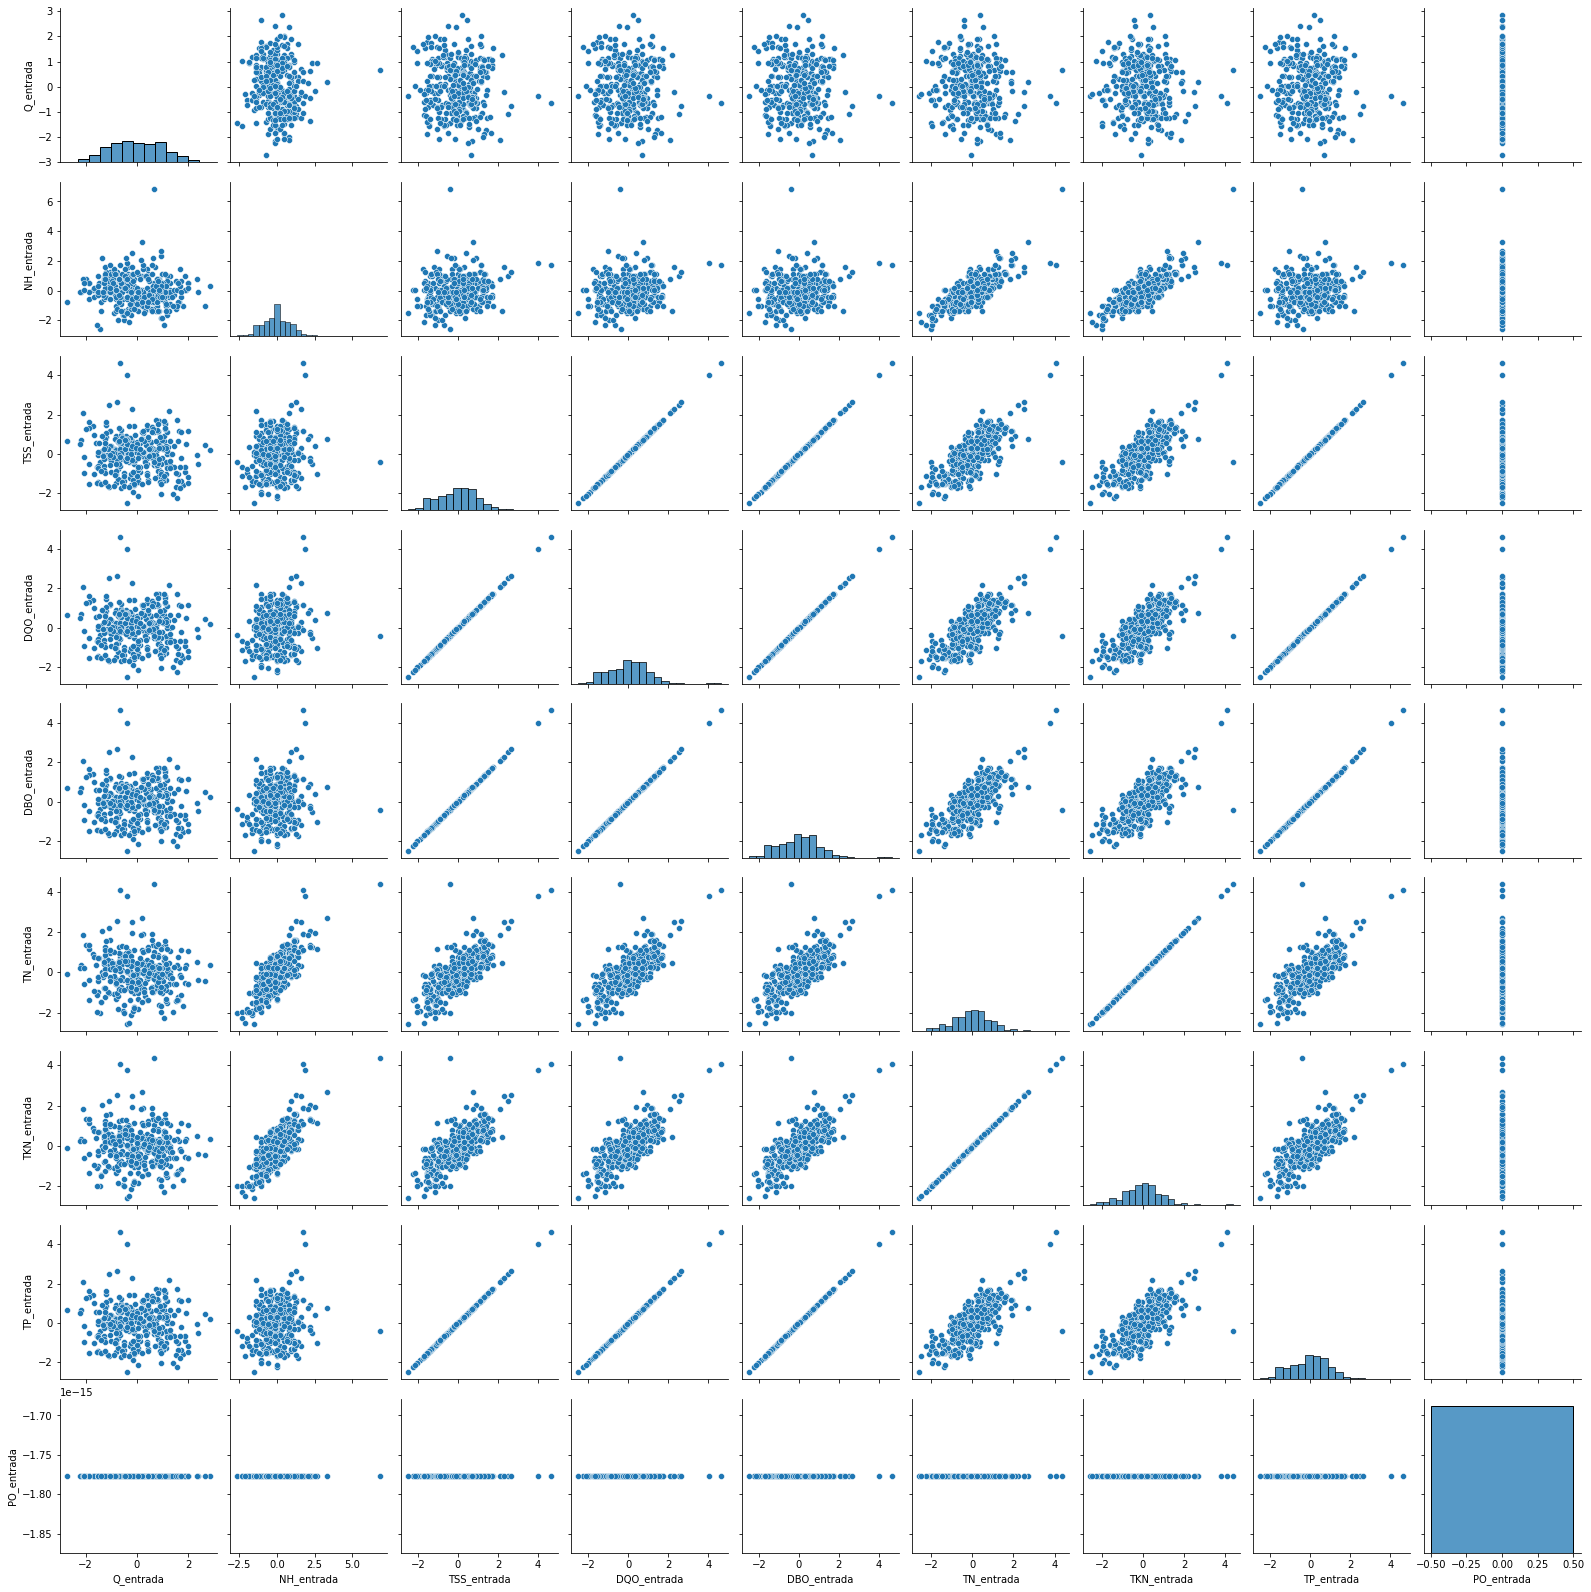

In [17]:
# libraries
import seaborn as sns
# Basic correlogram
sns.pairplot(normalized_x_train)
plt.show()

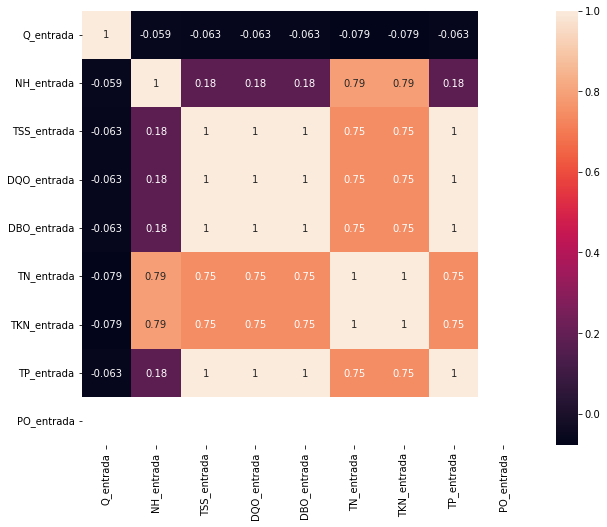

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
p1 = sns.heatmap(normalized_x_train.corr(), annot=True, annot_kws={"size": 10}, ax=ax)

In [19]:
# from collections import defaultdict

# cluster_ids = hierarchy.fcluster(dist_linkage, 1, criterion="distance")
# cluster_id_to_feature_ids = defaultdict(list)
# for idx, cluster_id in enumerate(cluster_ids):
#     cluster_id_to_feature_ids[cluster_id].append(idx)
# selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

# X_train_sel = X_train[:, selected_features]
# X_test_sel = X_test[:, selected_features]

# clf_sel = LinearRegression()
# clf_sel.fit(X_train_sel, y_train)
# print(
#     "Accuracy on test data with features removed: {:.2f}".format(
#         clf_sel.score(X_test_sel, y_test)
#     )
# )